In [71]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense,Dropout,Flatten
from keras.layers import Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.utils.np_utils import to_categorical
import cv2
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
train_dir='images/train'
test_dir='images/test'
eval_dir='images/eval'

In [73]:
#classes: Optional list of class subdirectories (e.g. ['dogs', 'cats'])
train_batch_gen=ImageDataGenerator(rescale=1./255.).flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=10,
    classes=['cat','dog'])

test_batch_gen=ImageDataGenerator(rescale=1./255.).flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=20,
    classes=['cat','dog'])  


eval_batch_gen=ImageDataGenerator(rescale=1./255.).flow_from_directory(
    eval_dir,
    target_size=(224,224),
    batch_size=20,
    classes=['cat','dog']) #can also do class_mode='binary' # seems by putting cat first is consider that [1,0] and dog is [0,1]


Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


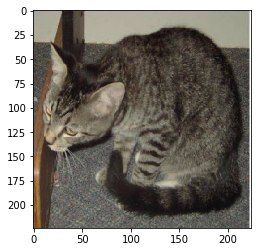

In [74]:
plt.imshow(imgs[0])

In [75]:
def visualize(img,ax):
    #img=cv2.imread(path)
    ax.imshow(img)

In [76]:
imgs,labels=next(train_batch_gen)
print(len(labels))

10


In [77]:
labels[0]

array([0., 1.], dtype=float32)

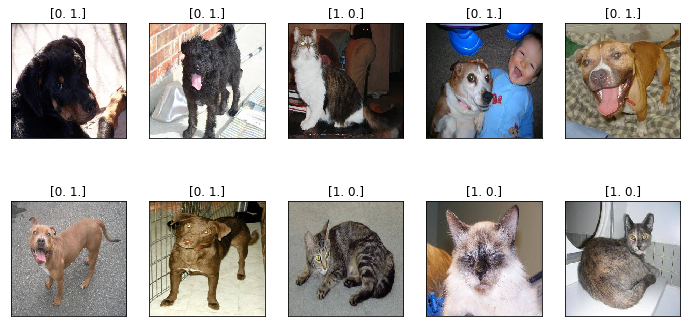

In [78]:
plt.figure(figsize=(12,6))
for i in range(len(labels)):
    ax=plt.subplot(2,len(labels)//2,i+1,xticks=[],yticks=[])
    visualize(imgs[i],ax)
    ax.set_title(labels[i])

# Building CNN

In [79]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)), #stride default (1,1), padding default='valid'
    Flatten(),
    Dense(2,activation='softmax')   #(224-3)/1 +1= > 222*222*32 => 222*222*32
])

In [80]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [81]:
#70 sample size, 10 batch size, 7 times to go through a train data in one epoch
history=model.fit_generator(train_batch_gen,epochs=10,steps_per_epoch=70//10,
                    validation_data=eval_batch_gen,validation_steps=20//20,verbose=2)

Epoch 1/10
 - 3s - loss: 3.6405 - acc: 0.5143 - val_loss: 1.1784 - val_acc: 0.5556
Epoch 2/10
 - 2s - loss: 0.8711 - acc: 0.7333 - val_loss: 1.6385 - val_acc: 0.5000
Epoch 3/10
 - 2s - loss: 0.6811 - acc: 0.7242 - val_loss: 1.9413 - val_acc: 0.4444
Epoch 4/10
 - 2s - loss: 0.8744 - acc: 0.6661 - val_loss: 2.2755 - val_acc: 0.4444
Epoch 5/10
 - 2s - loss: 0.5237 - acc: 0.8000 - val_loss: 1.0918 - val_acc: 0.5000
Epoch 6/10
 - 2s - loss: 0.4137 - acc: 0.8258 - val_loss: 1.1637 - val_acc: 0.5000
Epoch 7/10
 - 2s - loss: 0.6051 - acc: 0.7177 - val_loss: 2.0514 - val_acc: 0.5000
Epoch 8/10
 - 2s - loss: 0.3969 - acc: 0.8403 - val_loss: 1.2857 - val_acc: 0.4444
Epoch 9/10
 - 3s - loss: 0.2251 - acc: 0.9419 - val_loss: 2.6009 - val_acc: 0.5000
Epoch 10/10
 - 3s - loss: 0.5148 - acc: 0.8258 - val_loss: 1.9690 - val_acc: 0.5556


In [82]:
history_dic=history.history

In [83]:
history_dic

{'val_loss': [1.1783995628356934,
  1.638513445854187,
  1.9413237571716309,
  2.2755446434020996,
  1.0917747020721436,
  1.1637390851974487,
  2.0513577461242676,
  1.2857052087783813,
  2.60093092918396,
  1.969006896018982],
 'val_acc': [0.5555555820465088,
  0.5,
  0.4444444477558136,
  0.4444444477558136,
  0.5,
  0.5,
  0.5,
  0.4444444477558136,
  0.5,
  0.5555555820465088],
 'loss': [3.6405204364231656,
  1.0369182739544798,
  0.7270541527578908,
  0.930941438001971,
  0.5236876085400581,
  0.43269705339785547,
  0.5695363273543697,
  0.41099974561122155,
  0.22360276791357225,
  0.5716037828805706],
 'acc': [0.5142857219491687,
  0.6666666754969844,
  0.6935483909422352,
  0.6290322585451987,
  0.7999999948910305,
  0.8064516148259563,
  0.7419354934846202,
  0.8225806413158294,
  0.9354838651995505,
  0.8064516148259563]}

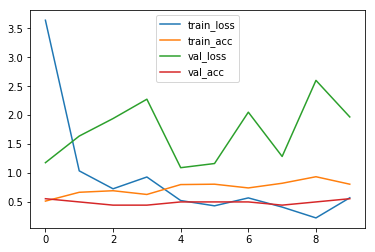

In [84]:
import matplotlib.pyplot as plt
list_epoch=np.arange(0,10)
plt.plot(list_epoch,history_dic['loss'])
plt.plot(list_epoch,history_dic['acc'])
plt.plot(list_epoch,history_dic['val_loss'])
plt.plot(list_epoch,history_dic['val_acc'])
plt.legend(['train_loss','train_acc','val_loss','val_acc'])

In [85]:
test_imgs,test_labels=next(test_batch_gen)

In [68]:
test_labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [86]:
prediction=model.predict_generator(test_batch_gen,steps=1,verbose=0)  #take two steps to go though all test

In [87]:
prediction

array([[9.9973315e-01, 2.6689182e-04],
       [9.8888212e-01, 1.1117891e-02],
       [8.8750249e-01, 1.1249746e-01],
       [1.0103681e-01, 8.9896315e-01],
       [5.7456970e-01, 4.2543030e-01],
       [4.2278862e-01, 5.7721138e-01],
       [9.8906040e-01, 1.0939571e-02],
       [9.3701929e-01, 6.2980726e-02],
       [9.9031770e-01, 9.6822884e-03],
       [4.6449703e-01, 5.3550297e-01],
       [9.9941730e-01, 5.8274454e-04],
       [1.9003972e-01, 8.0996031e-01],
       [9.9813336e-01, 1.8666177e-03],
       [6.5698123e-01, 3.4301874e-01],
       [9.9797505e-01, 2.0249623e-03],
       [9.2246002e-01, 7.7539921e-02],
       [9.7649890e-01, 2.3501135e-02],
       [9.9070764e-01, 9.2923576e-03],
       [9.9926656e-01, 7.3341170e-04],
       [2.3578490e-01, 7.6421511e-01]], dtype=float32)

In [88]:
test_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [89]:
prediction_round=np.argmax(prediction,axis=1)
test_round=np.argmax(test_labels,axis=1)

In [90]:
np.mean(prediction_round==test_round)

0.55

In [92]:
cm=confusion_matrix(prediction_round,test_round)

In [91]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[8 7]
 [2 3]]


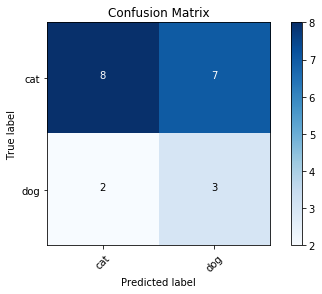

In [93]:
#if argmax=0 'cat' [1,0], if argmax=1 'dog' [0,1]
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')